<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 2 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>


## Problem Description
This assignment includes specific tasks to investigate open-ended questions. The open-ended questions ask you to think creatively and critically about how the plots you have
created provide insight into the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from forex_python.converter import CurrencyRates

# Task 1 
Analyze the dataset(task1.csv) contains information about the passengers of the sunken ship `RMS Lusitania`.

### 1. Read data and examine structure


The DataFrame.info() method in pandas library is used to print a concise summary of a DataFrame. It provides information about the DataFrame including the index dtype and column dtypes, non-null values, and memory usage.

In [2]:
dataFrame1 = pd.read_csv('task1.csv')
copy_df = dataFrame1.copy(deep=True)
nomissing_df = dataFrame1.copy(deep=True)

print("Dataset Info:")
dataFrame1.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


The DataFrame.head() method in pandas library is used to print first n rows of dataset.

In [3]:
print("\nFirst 5 rows:") 
print(dataFrame1.head())


First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


The DataFrame.head() method in pandas library is used to print last n rows of dataset.

In [4]:
print("\nLast 5 rows:")
print(dataFrame1.tail()) 


Last 5 rows:
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


The DataFrame.describe() method in pandas provides descriptive statistics for numerical columns in the DataFrame. It computes various summary statistics, including measures of central tendency (like mean, median), measures of dispersion (like standard deviation, min, max), and quantiles.

In [5]:
print("\nDescriptive Statistics:") 
dataFrame1.describe()


Descriptive Statistics:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
def print_unique_elements(df, column_name):
    try:
        unique_counts = df[column_name].value_counts()
        i = 0 
        for value, count in unique_counts.items():
            i = i + 1 
            print(f"{i} : {value} Count: {count}")
    except KeyError:
        print(f"Column '{column_name}' not found in the DataFrame.")

In [7]:
for column in dataFrame1.columns:
    null_count = dataFrame1[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")

Column 'survived' has 0 null value(s).
Column 'pclass' has 0 null value(s).
Column 'sex' has 0 null value(s).
Column 'age' has 177 null value(s).
Column 'sibsp' has 0 null value(s).
Column 'parch' has 0 null value(s).
Column 'fare' has 0 null value(s).
Column 'embarked' has 2 null value(s).
Column 'class' has 0 null value(s).
Column 'who' has 0 null value(s).
Column 'adult_male' has 0 null value(s).
Column 'deck' has 688 null value(s).
Column 'embark_town' has 2 null value(s).
Column 'alive' has 0 null value(s).
Column 'alone' has 0 null value(s).


### 2. Labeling categorical columns

In [8]:
cat_cols = ['sex', 'embarked', 'class', 'who', 'deck' , 'embark_town', 'alive']
le = LabelEncoder()

for col in cat_cols:
    dataFrame1[col] = le.fit_transform(dataFrame1[col])

dataFrame1[cat_cols]

,sex,embarked,class,who,deck,embark_town,alive
0,1,2,2,1,7,2,0
1,0,0,0,2,2,0,1
2,0,2,2,2,7,2,1
3,0,2,0,2,2,2,1
4,1,2,2,1,7,2,0
...,...,...,...,...,...,...,...
886,1,2,1,1,7,2,0
887,0,2,0,2,1,2,1
888,0,2,2,2,7,2,0
889,1,0,0,1,2,0,1


### 8. Handle missing values

In [9]:
def find_nan_lable(df , copy_df , column_name):
    for i in range (df.shape[0]):
        if (pd.isna(copy_df[column_name][i])):
            return df[column_name][i]

def refill_nas(df , copy_df , column_name):
    column = copy_df[column_name]
    if (not pd.isna(column).any()):
        return
    lable = find_nan_lable(df , copy_df , column_name)
    for i in range(df.shape[0]):
        if (df[column_name][i] == lable):
            df[column_name][i] = np.nan
            
def drop_columns(df , columns_list):
    cols = df.columns
    
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                columns_list.append(cols[j])
    
    df.drop(columns_list, axis=1, inplace=True)
    print(f"Dropped columns: {', '.join(columns_list)}")

In [10]:
drop_columns(nomissing_df , ['deck'])

cat_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']
le = LabelEncoder()

for col in cat_cols:
    nomissing_df[col] = le.fit_transform(nomissing_df[col])
    refill_nas(nomissing_df , copy_df , col)


Dropped columns: deck


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1696\3742556477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = np.nan
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1696\3742556477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = np.nan


In [11]:
imputer = IterativeImputer()

df_imputed = imputer.fit_transform(nomissing_df)

nomissing_df = pd.DataFrame(df_imputed, columns=nomissing_df.columns)

nomissing_df[cat_cols]
for column in nomissing_df.columns:
    null_count = nomissing_df[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")

Column 'survived' has 0 null value(s).
Column 'pclass' has 0 null value(s).
Column 'sex' has 0 null value(s).
Column 'age' has 0 null value(s).
Column 'sibsp' has 0 null value(s).
Column 'parch' has 0 null value(s).
Column 'fare' has 0 null value(s).
Column 'embarked' has 0 null value(s).
Column 'class' has 0 null value(s).
Column 'who' has 0 null value(s).
Column 'adult_male' has 0 null value(s).
Column 'embark_town' has 0 null value(s).
Column 'alive' has 0 null value(s).
Column 'alone' has 0 null value(s).


In [12]:
nomissing_df.head(50)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0,2.0,1.0,1.0,2.0,0.0,0.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,0.0,2.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0,2.0,2.0,0.0,2.0,1.0,1.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0,0.0,2.0,0.0,2.0,1.0,0.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0,2.0,1.0,1.0,2.0,0.0,1.0
5,0.0,3.0,1.0,29.904116,0.0,0.0,8.4583,1.0,2.0,1.0,1.0,1.0,0.0,1.0
6,0.0,1.0,1.0,54.000000,0.0,0.0,51.8625,2.0,0.0,1.0,1.0,2.0,0.0,1.0
7,0.0,3.0,1.0,2.000000,3.0,1.0,21.0750,2.0,2.0,0.0,0.0,2.0,0.0,0.0
8,1.0,3.0,0.0,27.000000,0.0,2.0,11.1333,2.0,2.0,2.0,0.0,2.0,1.0,0.0
9,1.0,2.0,0.0,14.000000,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### 3. heatmap of the correlation matrix

In [13]:
def plot_corr_matrix(df):
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=True, cmap='viridis')
    plt.show()

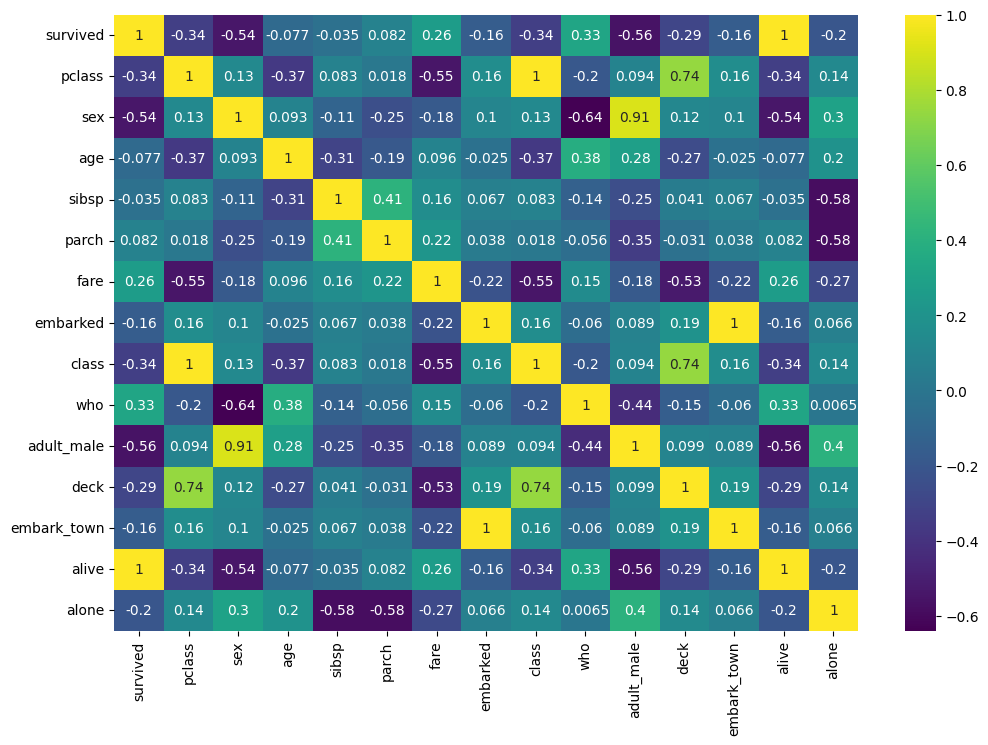

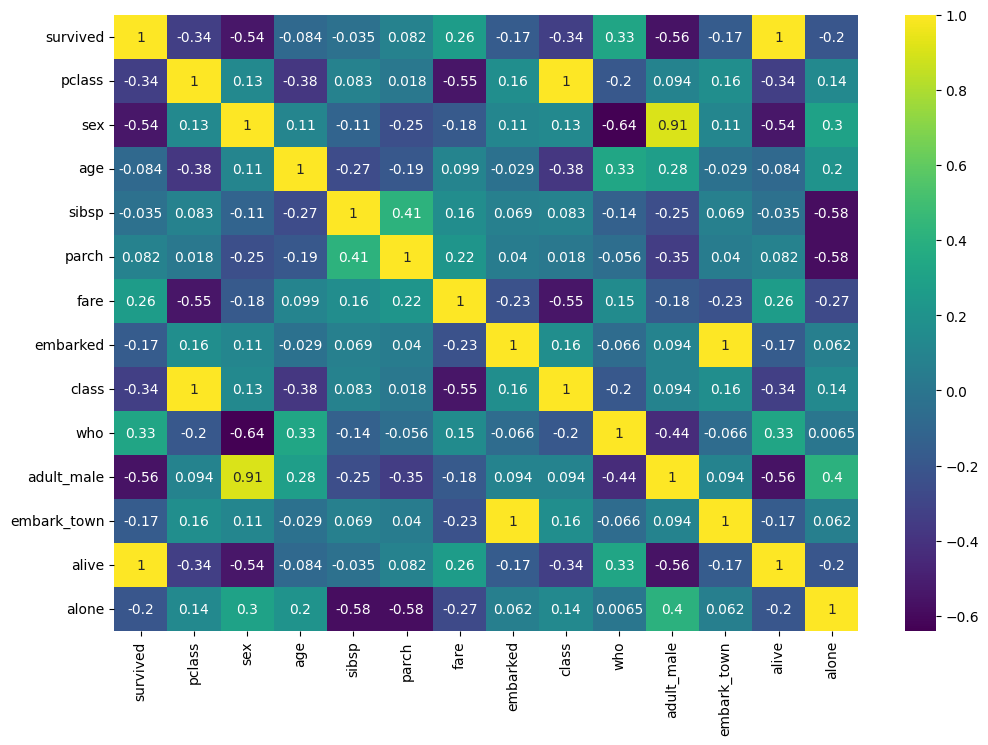

In [14]:
plot_corr_matrix(dataFrame1)
plot_corr_matrix(nomissing_df)

As you can see, both plot for dataFrame before and after filling missing values are nearly same that shows our approach for handling missing values is good enough.

### 4. Remove extra columns

In [15]:
drop_columns(dataFrame1 , ['alive' , 'embark_town' , 'pclass'])
dataFrame1

Dropped columns: alive, embark_town, pclass, embark_town


,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,1,22.0,1,0,7.2500,2,2,1,True,7,False
1,1,0,38.0,1,0,71.2833,0,0,2,False,2,False
2,1,0,26.0,0,0,7.9250,2,2,2,False,7,True
3,1,0,35.0,1,0,53.1000,2,0,2,False,2,False
4,0,1,35.0,0,0,8.0500,2,2,1,True,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,2,1,1,True,7,True
887,1,0,19.0,0,0,30.0000,2,0,2,False,1,True
888,0,0,NaN,1,2,23.4500,2,2,2,False,7,False
889,1,1,26.0,0,0,30.0000,0,0,1,True,2,True


### 5. Survived  passengers

In [16]:
survived = dataFrame1[dataFrame1['survived'] == 1].shape[0]
print(f"Number of passengers survived: {survived}")

Number of passengers survived: 342


### 6 . More that 30 passengers

In [17]:
older_females = dataFrame1[(dataFrame1['sex'] == 1) & (dataFrame1['age'] > 30)].shape[0]
nomissing_older_females = nomissing_df[(nomissing_df['sex'] == 1) & (nomissing_df['age'] > 30)].shape[0]
print(f"Number of female passengers older than 30 before imputation: {older_females}\nNumber of female passengers older than 30 after imputation: {nomissing_older_females}")

Number of female passengers older than 30 before imputation: 202
Number of female passengers older than 30 after imputation: 245


### 7.

In [18]:
cherbourg_highfare = dataFrame1[(dataFrame1['embarked'] == 0) & (dataFrame1['fare'] > 100)].shape[0] 
print(f"Number of Cherbourg passengers with fare > $100: {cherbourg_highfare}")

Number of Cherbourg passengers with fare > $100: 29


### 8. Average age of passengers

In [19]:
print(f"Average overall age before imputation: {dataFrame1['age'].mean():.2f}\nAverage overall age after imputation: {nomissing_df['age'].mean():.2f}")
print(f"Average male age before imputation: {dataFrame1[dataFrame1['sex']==0]['age'].mean():.2f}\nAverage male age after imputation: {nomissing_df[nomissing_df['sex']==0]['age'].mean():.2f}")  
print(f"Average female age before imputation: {dataFrame1[dataFrame1['sex']==1]['age'].mean():.2f}\nAverage female age after imputation: {nomissing_df[nomissing_df['sex']==1]['age'].mean():.2f}")

Average overall age before imputation: 29.70
Average overall age after imputation: 29.86
Average male age before imputation: 27.92
Average male age after imputation: 27.93
Average female age before imputation: 30.73
Average female age after imputation: 30.91


### 10. Correlation between fare paid and survival rate

In [20]:
print(f"\nCorrelation between fare and survival: {dataFrame1['fare'].corr(dataFrame1['survived']):.2f}")
survived = dataFrame1[dataFrame1['survived']==1]['fare'] 
not_survived = dataFrame1[dataFrame1['survived']==0]['fare']

print(f"Summary stats - Survived\nMean: {survived.mean():.2f}, Median: {survived.median():.2f}")
print(f"\nSummary stats - Not survived\nMean: {not_survived.mean():.2f}, Median: {not_survived.median():.2f}")

survival = dataFrame1['survived']
fare_paid = dataFrame1['fare']

r, p_value = stats.pointbiserialr(survival, fare_paid)

print(f"Point-biserial correlation coefficient: {r}")
print(f"P-value: {p_value}")


Correlation between fare and survival: 0.26
Summary stats - Survived
Mean: 48.40, Median: 26.00

Summary stats - Not survived
Mean: 22.12, Median: 10.50
Point-biserial correlation coefficient: 0.25730652238496243
P-value: 6.1201893419246185e-15


 The Pearson correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. Here, the correlation coefficient is approximately 0.26, indicating a **weak positive correlation** between fare paid and survival.

From mean of fare for each group we can conclude that survived people paid more fair than people who died.

 The point-biserial correlation coefficient measures the strength and direction of association between a binary variable (survival) and a continuous variable (fare). The p-value indicates the statistical significance of the correlation coefficient.
- The correlation coefficient (r) is approximately 0.26, indicating a weak positive correlation between fare paid and survival.
- The p-value (p_value) is very small (approximately 6.12e-15), which indicates that the correlation is statistically significant at a high level of confidence

### 11. proportion of passengers that survived by class

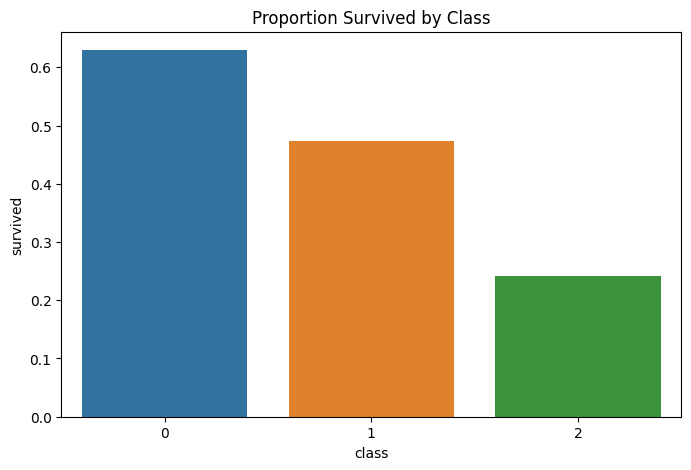

In [21]:
class_survived = dataFrame1.groupby('class')['survived'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(x='class', y='survived', data=class_survived, order=[0,1,2])
ax.set_title('Proportion Survived by Class')
plt.show()

### 12. Plot the age distribution of passengers, distinguishing between those who survived and those who didn't.

In [22]:
def plot_hist_distribution(data):
    plt.figure(figsize=(10,6))
    sns.histplot(data[data['survived']==1]['age'], label='Survived', bins=20, kde=False , color='red' , alpha=0.5) 
    sns.histplot(data[data['survived']==0]['age'], label='Not Survived', bins=20, kde=False , color='b' , alpha=0.5)
    plt.title('Age Distribution by Survival', fontsize=16)
    plt.legend()
    plt.show()

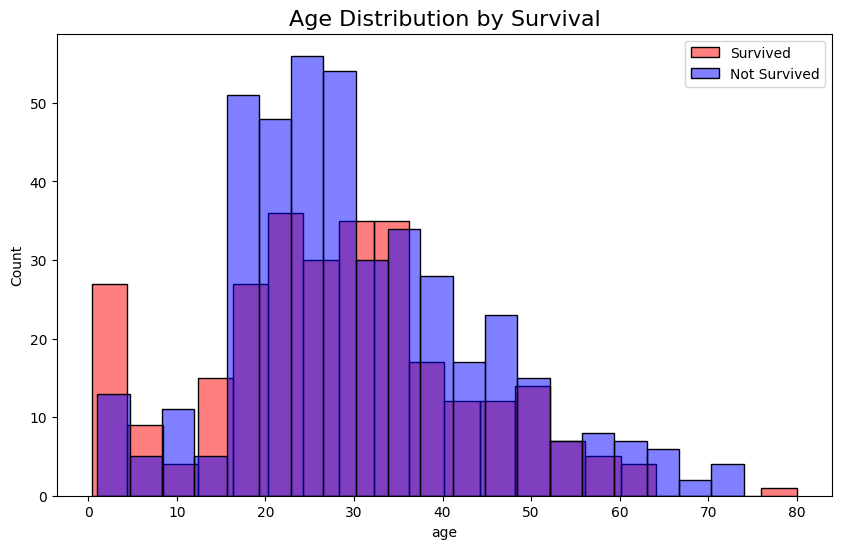

In [23]:
plot_hist_distribution(dataFrame1)

* Survived :
    - Passengers in their late teens to early 30s have the highest counts of survivors.
    - The survival rate decreases as age increases.
* Not Survived :
    - The majority of passengers who did not survive fall into the age range of late teens to early 30s.
    - There is a noticeable decline in the number of non-survivors among older age groups.
Overall, the graph suggests that age played a role in survival during the event represented. Young children and young adults had better chances of survival compared to other age groups.

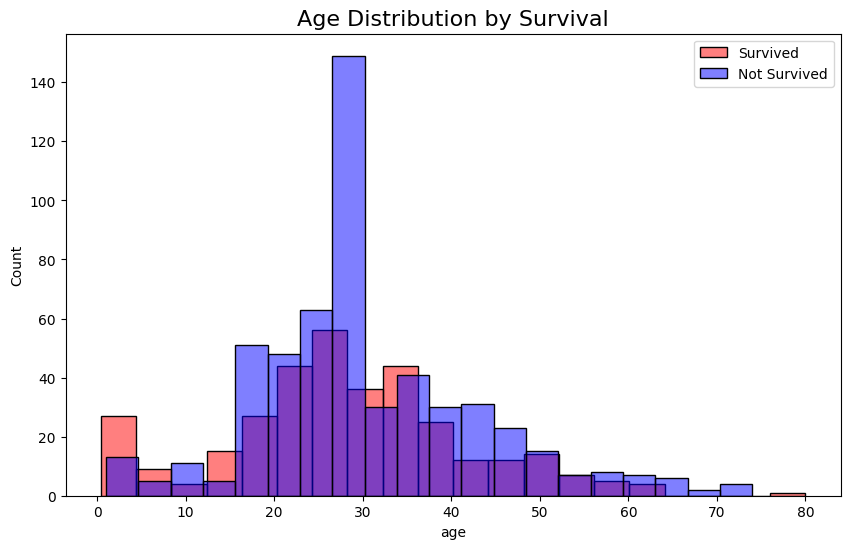

In [24]:
plot_hist_distribution(nomissing_df)

this difference maybe because of after imputing null value, most of age null values fill with a number betwen 25 to 32

### 13. scatter plot showing the relationship between age and fare paid.


In [25]:
def plot_survival_ages_scaterr(data):
    plt.figure(figsize=(10,6))
    survived = data[data['survived']==1]
    not_survived = data[data['survived']==0]
    plt.scatter(survived['age'], survived['fare'], c='g', label='Survived', alpha=0.5)
    plt.scatter(not_survived['age'], not_survived['fare'], c='r', label='Not Survived', alpha=0.5)
    plt.title('Age vs Fare by Survival Status', fontsize=16)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend()
    plt.show()

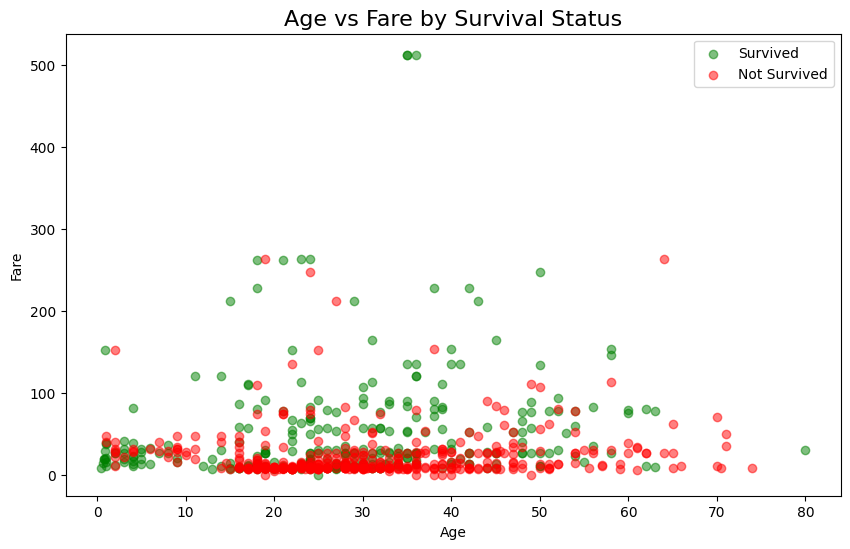

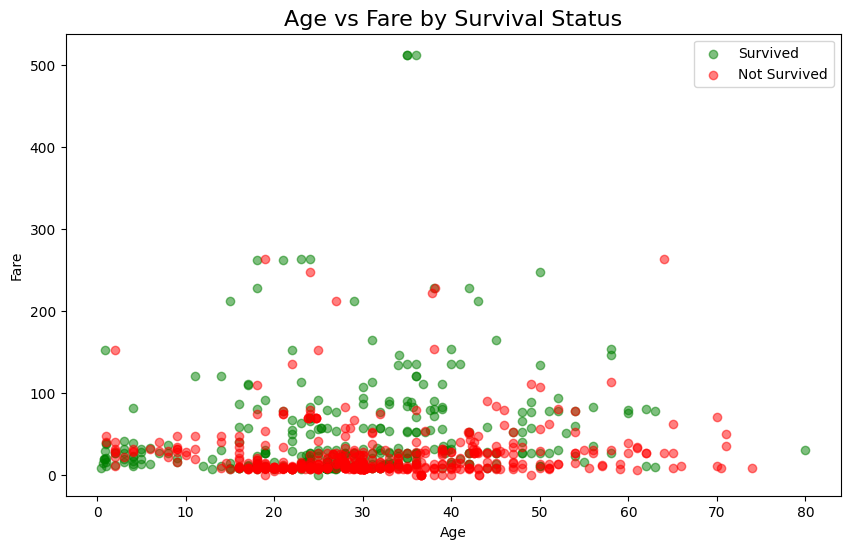

In [26]:
plot_survival_ages_scaterr(dataFrame1)
plot_survival_ages_scaterr(nomissing_df)

As you see there is a very weak positive correlation between Age and Fare. you can see in heatmap of Question 3 this number is 0.099.  

### 14.  pivot table to show the average fare and survival rate for each class and sex combination.

In [27]:
table = pd.pivot_table(dataFrame1, values=['fare','survived'], index=['class'],columns=['sex'], aggfunc={'fare':np.mean, 'survived':np.mean})
print(table)

             fare             survived          
sex             0          1         0         1
class                                           
0      106.125798  67.226127  0.968085  0.368852
1       21.970121  19.741782  0.921053  0.157407
2       16.118810  12.661633  0.500000  0.135447


sex : 1 = female , 0=male
class : 0 = class First , 1 = class Second , 2 = class Third

### 15. Plot a grouped bar chart to show the average fare paid by passengers,grouped by their class and survival status

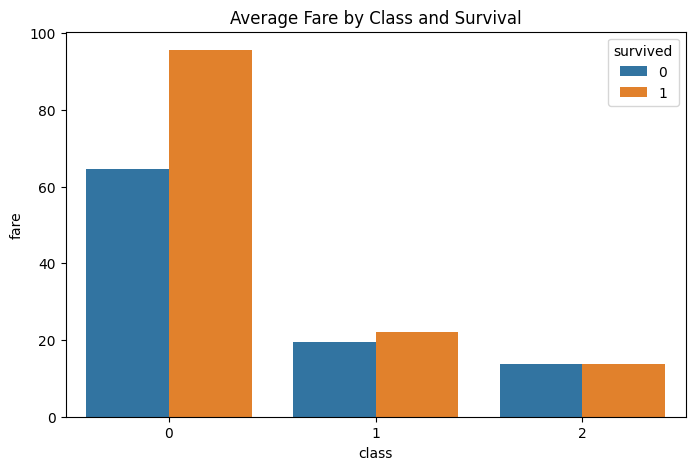

In [28]:
fare_grouped = dataFrame1.groupby(['class', 'survived'])['fare'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(x='class', y='fare', hue='survived', data=fare_grouped)
ax.set_title('Average Fare by Class and Survival')
plt.show()

* For **class 0**, both groups of passengers have higher fares than other classes, with survivors paying more on average.
* **Classes 1 and 2** have lower fares, with minimal differences between survivors and non-survivors.

# Task 2
In this task we focus on data scientist salaries across different regions from 2020 to 2024.

In [29]:
dataFrame2 = pd.read_csv('task2.csv')

dataFrame2.drop_duplicates(inplace=True)
dataFrame2.dropna(inplace=True)

In [30]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8407 entries, 0 to 13971
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Work_Year         8407 non-null   int64 
 1   Experience_Level  8407 non-null   object
 2   Employment_Type   8407 non-null   object
 3   Job_Title         8407 non-null   object
 4   Salary            8407 non-null   int64 
 5   Salary_Currency   8407 non-null   object
 6   Remote_Ratio      8407 non-null   int64 
 7   Company_Size      8407 non-null   object
dtypes: int64(3), object(5)
memory usage: 591.1+ KB


In [31]:
display(dataFrame2)

,Work_Year,Experience_Level,Employment_Type,Job_Title,Salary,Salary_Currency,Remote_Ratio,Company_Size
0,2024,Senior-Level,Full-Time,AI Engineer,90000,USD,0,Large
1,2024,Senior-Level,Full-Time,Machine Learning Engineer,180500,USD,0,Medium
2,2024,Senior-Level,Full-Time,Machine Learning Engineer,96200,USD,0,Medium
3,2024,Senior-Level,Full-Time,Machine Learning Engineer,235000,USD,0,Medium
4,2024,Senior-Level,Full-Time,Machine Learning Engineer,175000,USD,0,Medium
...,...,...,...,...,...,...,...,...
13967,2020,Senior-Level,Full-Time,Data Scientist,412000,USD,100,Large
13968,2021,Mid-Level,Full-Time,Principal Data Scientist,151000,USD,100,Large
13969,2020,Entry-Level,Full-Time,Data Scientist,105000,USD,100,S
13970,2020,Entry-Level,Contract,Business Data Analyst,100000,USD,100,Large


Change Data Science to Data Scientist and ML Engineer to Machine Learning Engineer


In [32]:
dataFrame2.loc[dataFrame2['Job_Title'] == 'Data Science', 'Job_Title'] = 'Data Scientist'
dataFrame2.loc[dataFrame2['Job_Title'] == 'ML Engineer', 'Job_Title'] = 'Machine Learning Engineer'

In [33]:
currencies = dataFrame2['Salary_Currency'].value_counts()
print(f"Currencies:\n{currencies}")

Currencies:
Salary_Currency
USD    7499
GBP     410
EUR     339
INR      52
CAD      48
AUD      12
PLN       7
CHF       6
SGD       6
JPY       4
BRL       4
DKK       3
HUF       3
TRY       3
NOK       2
THB       2
ZAR       1
HKD       1
ILS       1
PHP       1
NZD       1
MXN       1
CLP       1
Name: count, dtype: int64


Remove datas associated with currencies represented fewer than ten times and standardize datas to a single currency.

In [34]:
curr_filter = currencies[currencies >= 10].index
dataFrame2 = dataFrame2[dataFrame2['Salary_Currency'].isin(curr_filter)]

c = CurrencyRates()

for curr in curr_filter:
    if curr != 'USD':
        dataFrame2.loc[dataFrame2['Salary_Currency'] == curr, 'Salary_in_usd'] = dataFrame2[dataFrame2['Salary_Currency']==curr]['Salary'] * c.get_rate(curr, 'USD')
    else:
        dataFrame2.loc[dataFrame2['Salary_Currency'] == 'USD', 'Salary_in_usd'] = dataFrame2[dataFrame2['Salary_Currency']=='USD']['Salary']
        
dataFrame2.drop('Salary', axis=1, inplace=True)

print(f"\nTop 10 job titles:\n{dataFrame2['Job_Title'].value_counts()[:10]}")

print(f"\nTop 10 salaries:\n{dataFrame2.sort_values('Salary_in_usd', ascending=False)['Salary_in_usd'].head(10)}")


Top 10 job titles:
Job_Title
Data Scientist                   1688
Data Engineer                    1584
Data Analyst                     1141
Machine Learning Engineer         931
Analytics Engineer                315
Research Scientist                265
Data Architect                    224
Research Engineer                 177
Applied Scientist                 114
Business Intelligence Analyst     113
Name: count, dtype: int64

Top 10 salaries:
242     800000.0
1085    774000.0
4936    750000.0
2060    750000.0
3844    750000.0
3850    750000.0
1884    750000.0
2471    750000.0
4828    750000.0
3286    720000.0
Name: Salary_in_usd, dtype: float64


Data distributions  

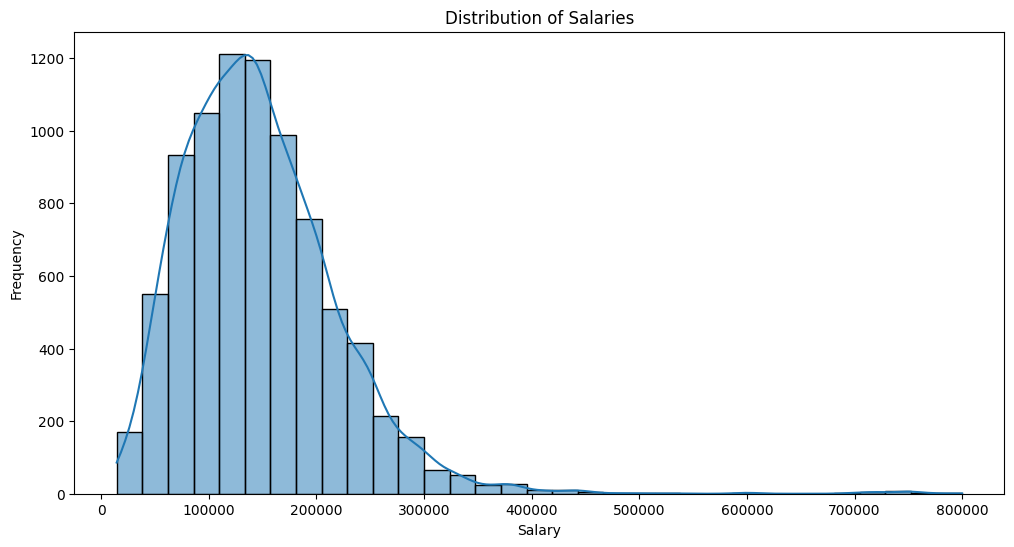

In [35]:
n = len(dataFrame2['Salary_in_usd'].unique())
IQR = (dataFrame2['Salary_in_usd'].quantile(0.75) - dataFrame2['Salary_in_usd'].quantile(0.25))/400
num_bins = int(2 * IQR * n **(-1/3))
plt.figure(figsize=(12, 6))
sns.histplot(dataFrame2['Salary_in_usd'], bins=num_bins, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

* The distribution is **right-skewed**, meaning that it has a long tail on the right side.
* Most salaries are concentrated on the lower end, and there are fewer individuals with higher salaries.
* The highest frequency (peak) occurs around the salary range of approximately $100,000.
* This suggests that a significant number of people earn salaries close to this value.

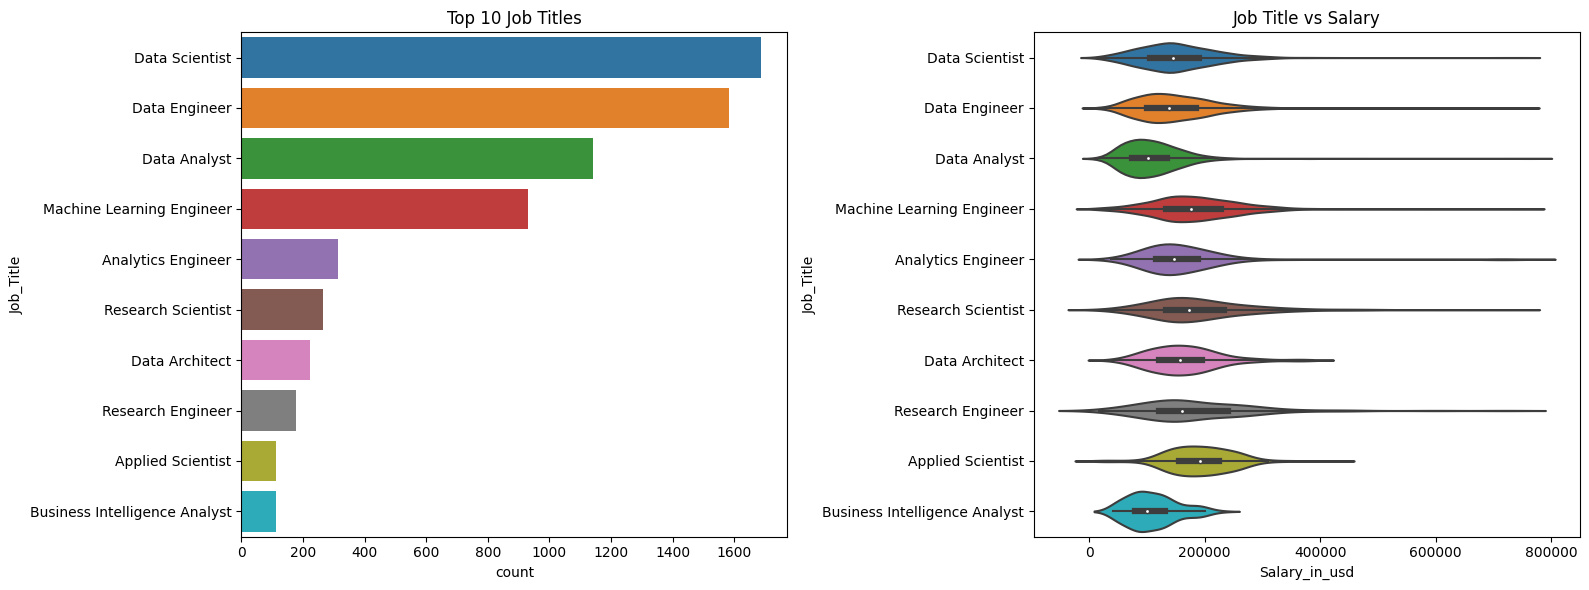

In [36]:
plt.figure(figsize=(16,6))



plt.subplot(1,2,1) 
sns.countplot(y='Job_Title', data=dataFrame2, order=dataFrame2['Job_Title'].value_counts().index[:10])
plt.title('Top 10 Job Titles')  

plt.subplot(1,2,2)
sns.violinplot(y='Job_Title', x='Salary_in_usd', data=dataFrame2, order=dataFrame2['Job_Title'].value_counts().index[:10])
plt.title('Job Title vs Salary')

plt.tight_layout()
plt.show()

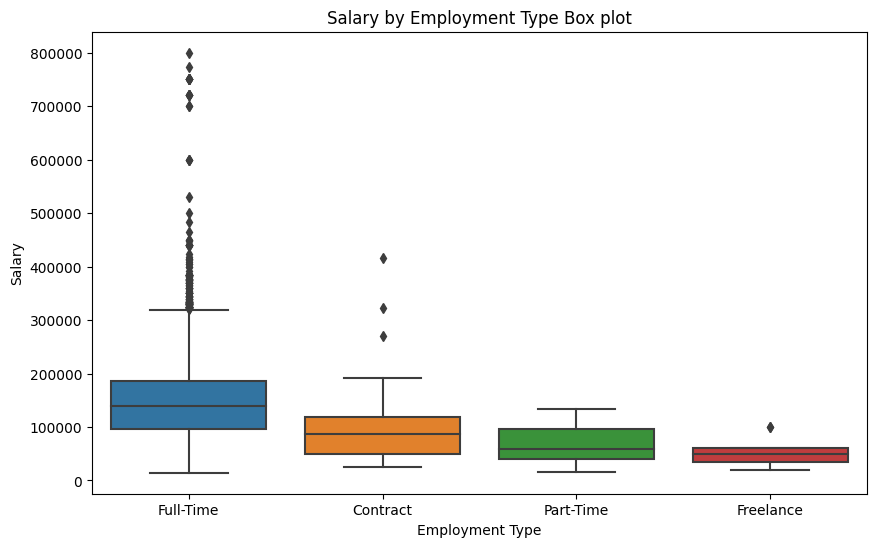

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Type', y='Salary_in_usd', data=dataFrame2)
plt.title('Salary by Employment Type Box plot')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

* **Full-Time Employees:**      
   - The median salary for Full-Time employees is around $150,000.
   - The interquartile range (IQR), represented by the width of the box, indicates that most Full-Time employees earn salaries between approximately $100,000 and $200,000.
   - There are several outliers on the higher end, suggesting that some Full-Time employees earn significantly more (up to $800,000).                  
* **Contract Employees:**                    
   - The median salary for Contract employees is nearly same as Q1 of Full-time(around $100,000).
   - The IQR for Contract employees is narrower, indicating less variation in salaries.
   - There are fewer outliers among Contract employees compared to Full-Time employees.                 
* **Part-Time Employees:**                   
   - The IQR for Part-Time employees is even narrower, suggesting less variability in salaries.
   - There are no visible outliers for Part-Time employees.                 
* **Freelance Workers:**                   
   - The median salary for Freelancers is low, similar to Part-Time employees.
   - The IQR for Freelancers is also narrow.
   - There is one outlier among Freelancers who earns significantly more than the rest.                   
* **Overall Interpretation:**               
   - Full-Time employees have the widest salary range, with some earning exceptionally high salaries.
   - Contract employees have a narrower range but higher median salaries.
   - Part-Time employees and Freelancers earn lower salaries on average.

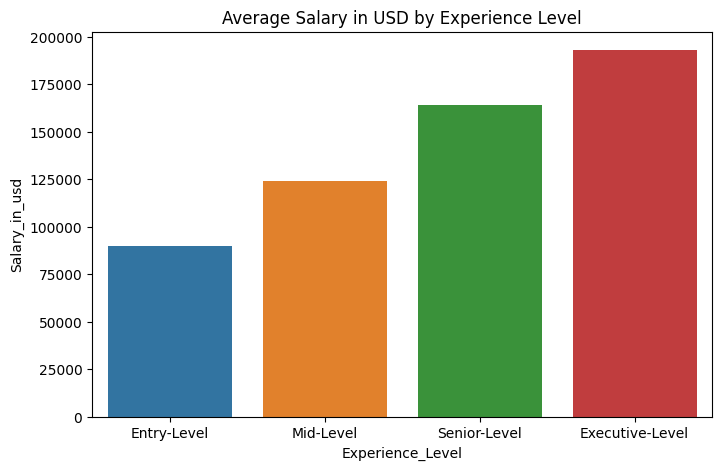

In [38]:
experience_salary = dataFrame2.groupby('Experience_Level')['Salary_in_usd'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Experience_Level', y='Salary_in_usd', data=experience_salary,order=['Entry-Level','Mid-Level','Senior-Level','Executive-Level'])
ax.set_title('Average Salary in USD by Experience Level')
plt.show() 

As you can see the higher the experience, the higher the salary.

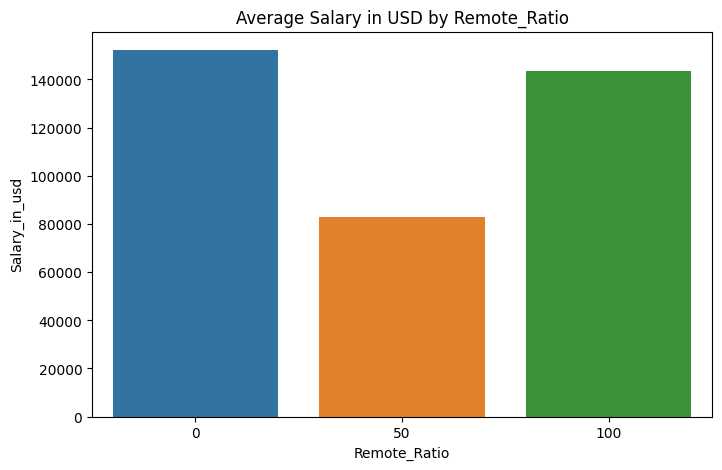

In [39]:
experience_salary = dataFrame2.groupby('Remote_Ratio')['Salary_in_usd'].mean().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Remote_Ratio', y='Salary_in_usd', data=experience_salary)
ax.set_title('Average Salary in USD by Remote_Ratio')
plt.show() 

Not much useful information can be taken from this plot.

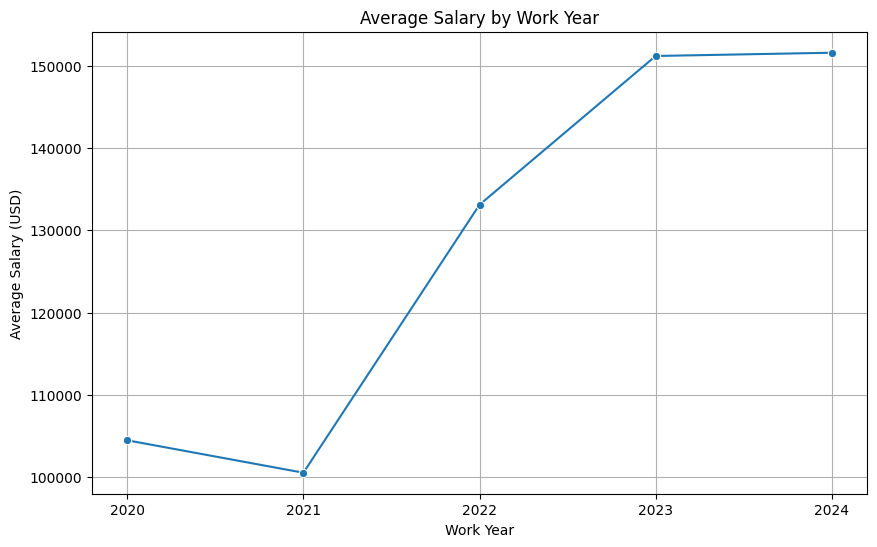

In [53]:
average_salary_by_work_year = (dataFrame2.groupby("Work_Year")["Salary_in_usd"].mean().reset_index())

plt.figure(figsize=(10, 6))
sns.lineplot(x="Work_Year", y="Salary_in_usd", data=average_salary_by_work_year, marker="o")
plt.title("Average Salary by Work Year")
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.xticks(ticks=dataFrame2["Work_Year"].unique())
plt.grid(True)
plt.show()

- we have a huge increase in Salary from 2021 to 2023.
- we have a little decrease in Salary from 2020 to 2021.
- after 2023 the income has remained almost constant.

In [41]:
def cat_plot(f1 , f2):
    sns.catplot(x=f1, y='Salary_in_usd', hue=f2, data=dataFrame2, kind='bar', height=6, aspect=2)
    plt.title(f'Salary Distribution by {f1} and {f2}')
    plt.xticks(rotation=45)
    plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


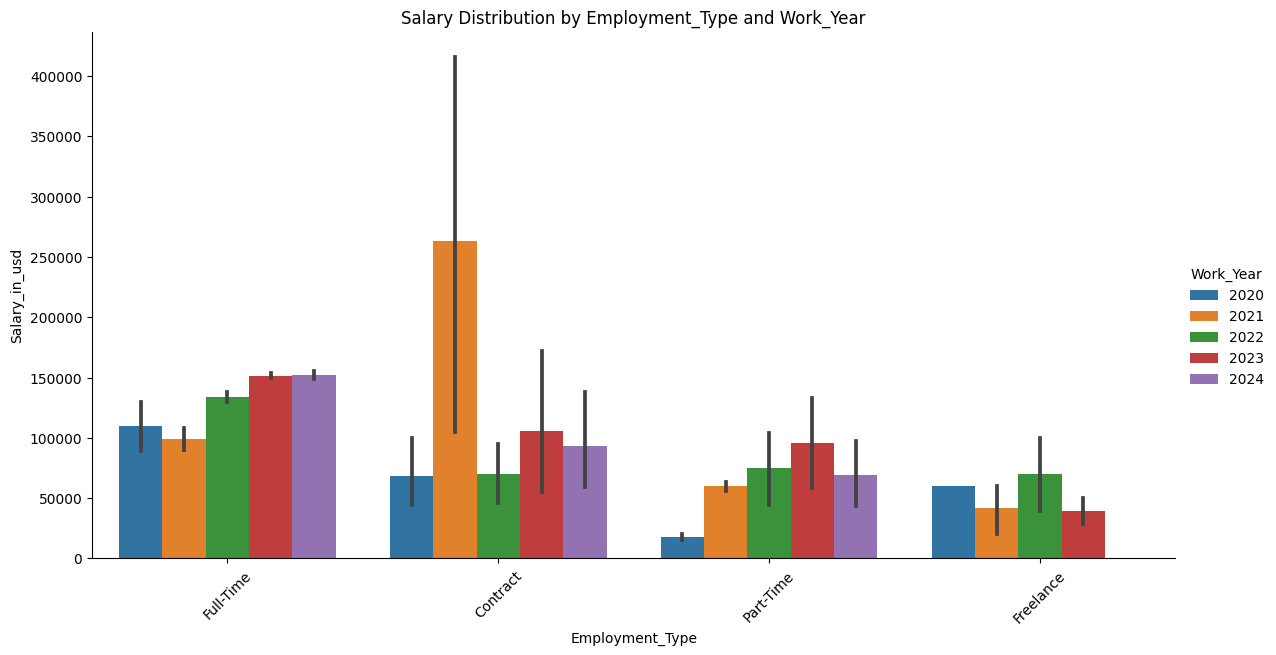

In [42]:
cat_plot('Employment_Type','Work_Year')

- 2021 was the best year for `Contract Employees` because the earn much more than other years.
- `Part-time` employees have increasement in their salary every year until 2023 but in 2024 their salary is same as 2021.
- we don't have any information about `Freelance` employees in 2024.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


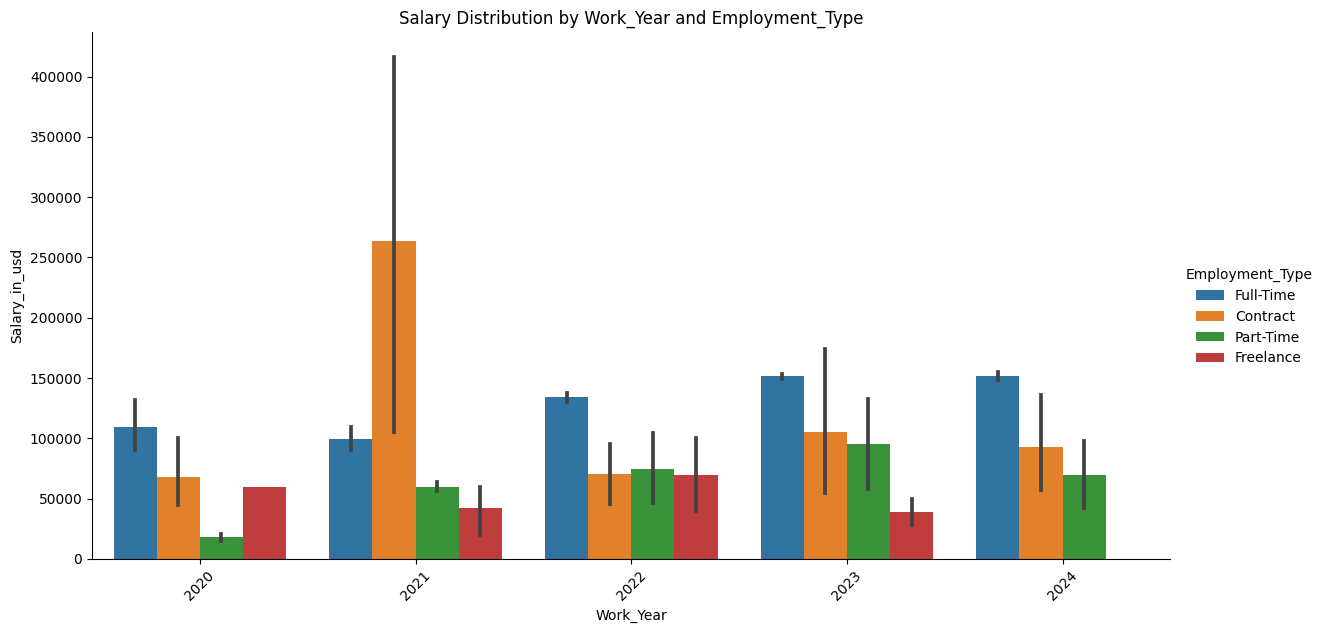

In [43]:
cat_plot('Work_Year','Employment_Type')

- Very instresting to see that `Contract` employees earn significantly more than other employees type in 2021.Looks like something happen in this year for them.
- In other years `Full-time` employees have the most salary.
- 2020 `Part_time` earn significantly less than other groups.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


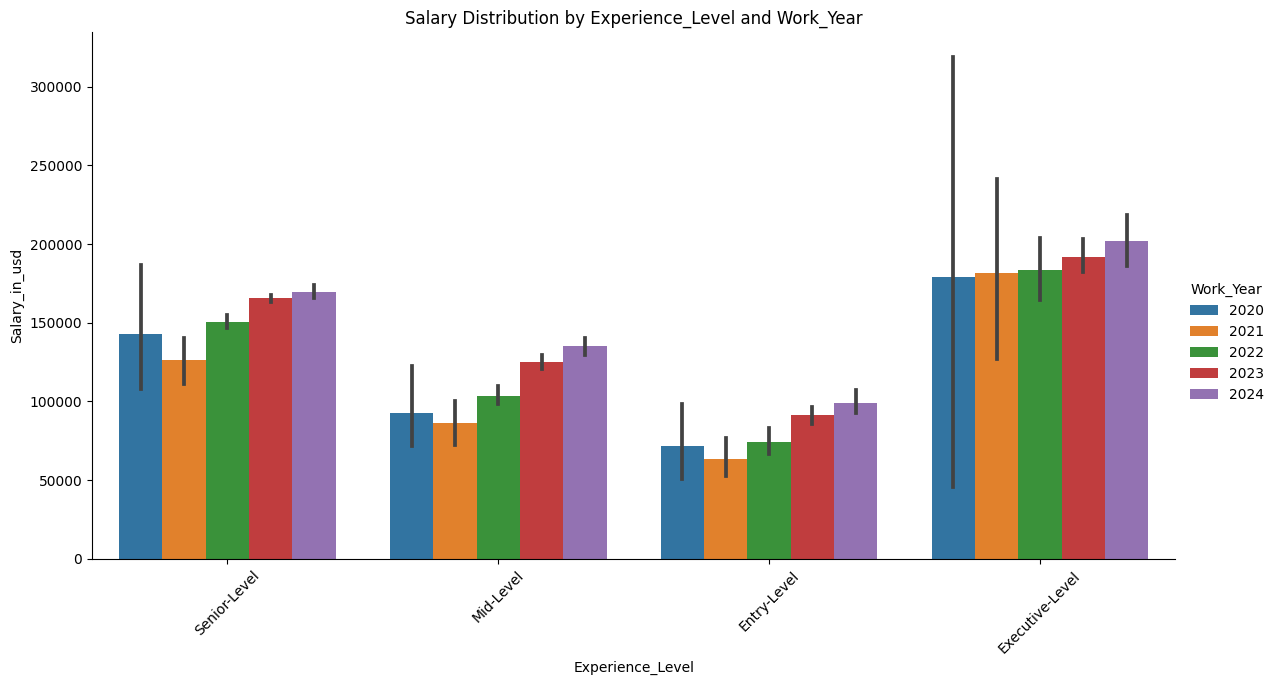

In [44]:
cat_plot('Experience_Level','Work_Year')

- We see a particular order in all Experience_Levels and Work_Years. For Each Experience_Level salary increase as Work_Year increase except 2020->2021 that salary decreases.(We don't have this exception for Executive_Level)

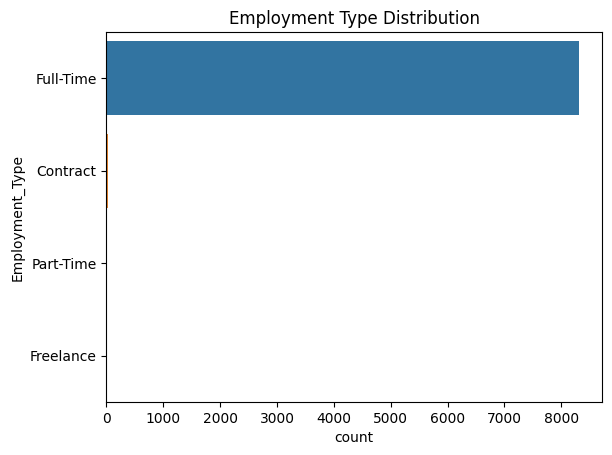

In [45]:
sns.countplot(y='Employment_Type', data=dataFrame2, order=dataFrame2['Employment_Type'].value_counts().index)
plt.title('Employment Type Distribution') 
plt.show()

As you can see from this plot most of out employment are working in Full-time jobs.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


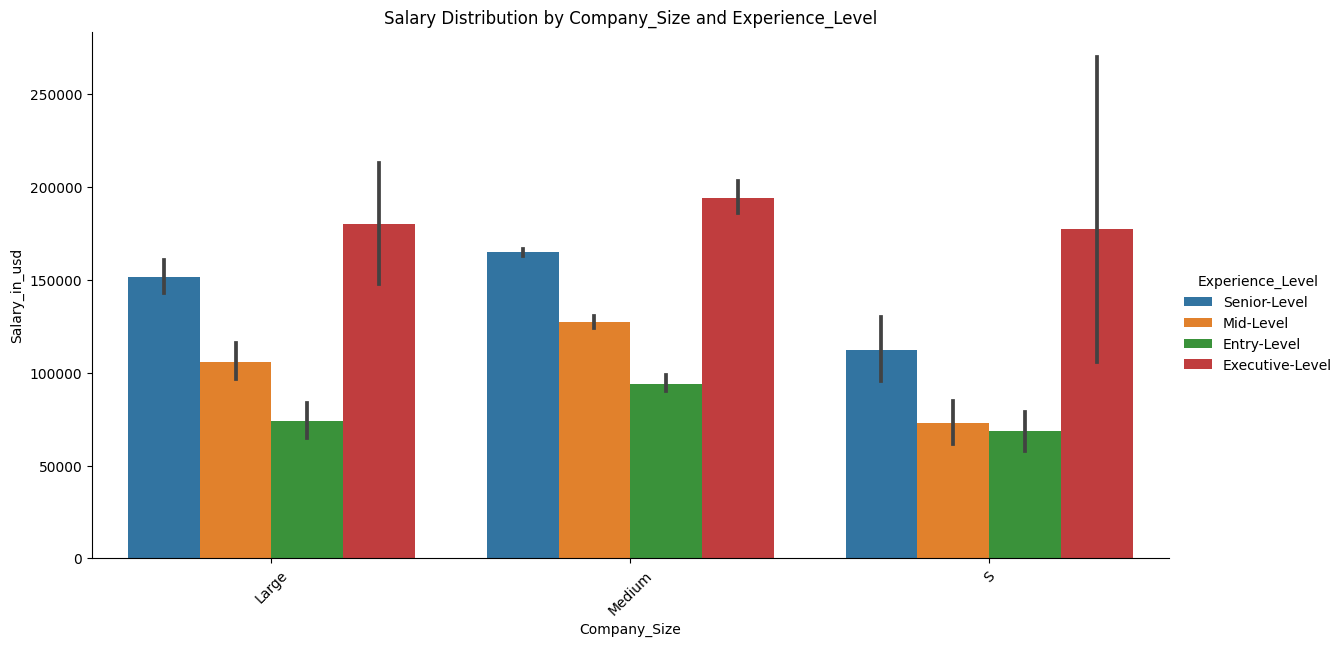

In [46]:
cat_plot('Company_Size','Experience_Level')

- Any company of any size paid salary in folowing order: Executive-Level > Senior-Level > Mid-Level > Entry-Level

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


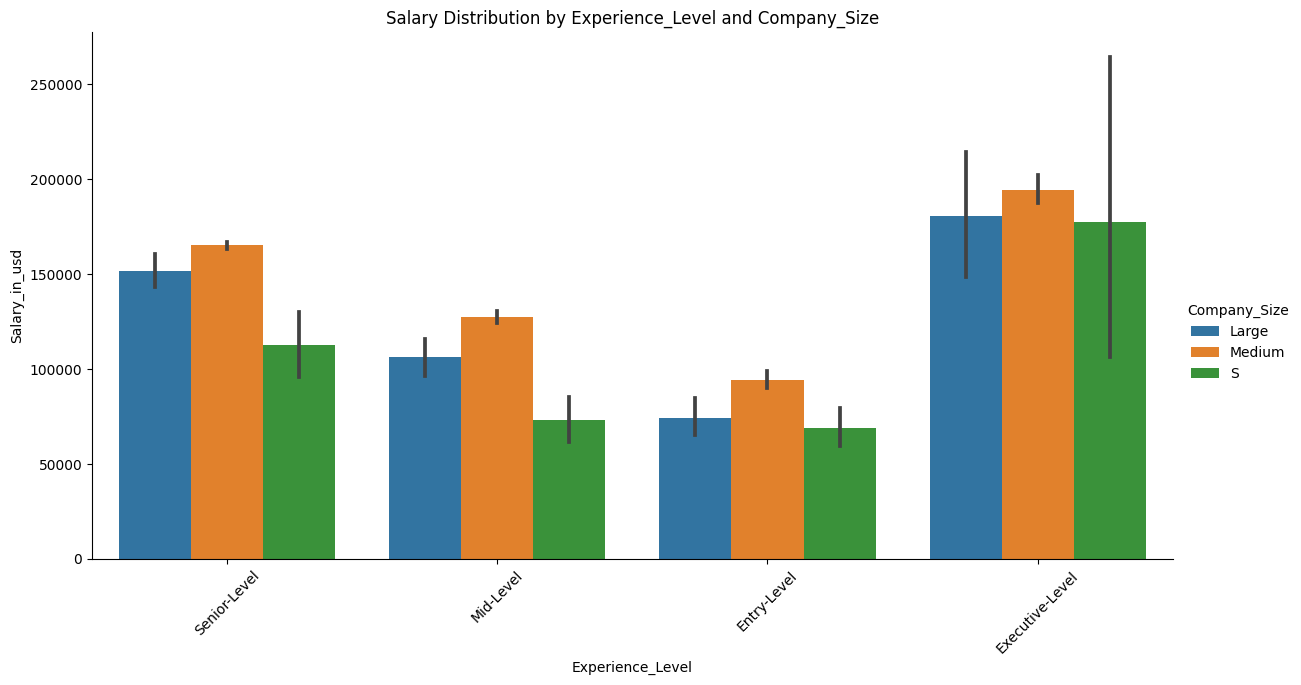

In [47]:
cat_plot('Experience_Level','Company_Size')

- In all levels of experience, employees that work in Medium companies earn more salary than employees work in Large companies.